# Packages

## Global Packages

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
import sys
import json
import math
import wave
import shutil
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Audio
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

import librosa
import seaborn as sns
import soundfile as sf
import sounddevice as sd
from tensorflow import keras
from IPython.display import Audio, display
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import librosa.display

## Personal Packages

In [ ]:
from packages.utils import get_and_convert_file_size

from packages.features import create_test_audio_dataset
from packages.features import create_train_audio_dataset
from packages.features import preprocess_melspec_audio_datasets

from packages.model import model
from packages.model import evaluate_model
from packages.model import plot_training_history
from packages.model import plot_confusion_matrix
from packages.model import compile_and_train_model

## Constants

In [ ]:
SEED = 42
N_MFCC = 13
N_FFT = 2048
BATCH_SIZE = 64
HOP_LENGTH = 512
TRACK_DURATION = 2
SAMPLE_RATE = 16000
VALIDATION_SPLIT = 0.2
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

# Raw Audio Data File Paths

The dataset's audio clips are of 6 classes and stored in six folders corresponding to each speech command: 
- `ddyo`- `kkono` - `mu maaso` - `emabega` - `yimirira` - `gaali`

In [2]:
train_data_dir = pathlib.Path('Dataset/Train')
test_data_dir = pathlib.Path('Dataset/Test')

process_train_data_dir = pathlib.Path('Dataset/Process_train')
process_test_data_dir = pathlib.Path('Dataset/Process_test')

json_train_data_dir = pathlib.Path('files/json/data_train.json')
json_test_data_dir = pathlib.Path('files/json/data_test.json')

## Load sample audio files

In [7]:
emabega_file_path = os.path.join(test_data_dir, 'emabega', 'emabega_1.wav')
ddyo_file_path = os.path.join(test_data_dir, 'ddyo', 'ddyo_1.wav')
yimirira_file_path = os.path.join(test_data_dir, 'yimirira', 'yimirira_1.wav')
kkono_file_path = os.path.join(test_data_dir, 'kkono', 'kkono_1.wav')
mumasso_file_path = os.path.join(test_data_dir, 'mumaaso', 'mumaaso_1.wav')
gaali_file_path = os.path.join(test_data_dir, 'gaali', 'gaali_1.wav')


file_paths = [emabega_file_path, 
              ddyo_file_path, 
              yimirira_file_path, 
              kkono_file_path, 
              mumasso_file_path, 
              gaali_file_path
             ]

# Load the audio dataset

In [ ]:
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:

def create_train_audio_dataset(data_dir, json_path, num_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH, num_segments=2, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT, seed=SEED, output_sequence_length=SAMPLE_RATE):
    # Extract MFCCs and save to JSON
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(data_dir)):
        if dirpath != data_dir:
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

                # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [ ]:
# create_train_audio_dataset(train_data_dir, json_train_data_dir)

In [ ]:
def create_test_audio_dataset(data_dir, json_path, num_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH, num_segments=2, output_sequence_length=SAMPLE_RATE):
    # Extract MFCCs and save to JSON
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(data_dir)):
        if dirpath is not data_dir:
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

                # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(numz_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [ ]:
# create_test_audio_dataset(test_data_dir, json_test_data_dir)

In [ ]:
TRAIN_DATA_PATH = "files/json/data_train.json"
TEST_DATA_PATH = "files/json/data_test.json"

In [ ]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


In [ ]:
def prepare_datasets(validation_size):
    """Loads data and splits it into train and validation sets.

    :param validation_size (float): Value in [0, 1] indicating percentage of data set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    """

    # load data
    X, y = load_data(TRAIN_DATA_PATH)

    # create train and validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, X_validation, y_train, y_validation


In [ ]:
X_train, X_validation, y_train, y_validation = prepare_datasets(0.2)

In [ ]:
# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(32, 13, 1)

In [ ]:
def load_test_dataset(test_data_path):
    """Loads test data and prepares it for use with the model.

    :param test_data_path (str): Path to the test data

    :return X_test (ndarray): Input test set
    :return y_test (ndarray): Target test set
    """

    # Load the test data
    X_test, y_test = load_data(test_data_path)

    # Add an axis to the input set
    X_test = X_test[..., np.newaxis]

    return X_test, y_test

In [ ]:
X_test, y_test = load_test_dataset(TEST_DATA_PATH)

In [ ]:
X_test.shape[1], X_test.shape[2], 1

(32, 13, 1)

# Feature Extraction
## Mel spectograms

In [ ]:
from modules.data_processing import preprocess_mfcc_audio_datasets

In [ ]:
train_mfcc_ds, val_mfcc_ds, test_mfcc_ds = preprocess_mfcc_audio_datasets(train_ds, val_ds, test_ds)

## Shape consistency

In [39]:
print(train_mfcc_ds.element_spec)
print(val_mfcc_ds.element_spec)
print(test_mfcc_ds.element_spec)

(TensorSpec(shape=(None, 124, 13, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 124, 13, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 124, 13, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


# Model 1

### Input shape 

In [40]:
example_spectrograms = next(iter(train_mfcc_ds))[0]
input_shape = example_spectrograms.shape[1:]

print('Input shape:', input_shape)
num_labels = len(label_names)

Input shape: (124, 13, 1)


In [41]:
print(f'Labels {label_names}')

Labels ['ddyo' 'emabega' 'gaali' 'kkono' 'mumaaso' 'unknown' 'yimirira']


### Model Architecture

In [42]:
# model = models.Sequential([
#     layers.Input(shape=input_shape),
#     layers.Conv2D(16, 3, activation='relu', padding='same'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, activation='relu', padding='same'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, activation='relu', padding='same'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(128, 3, activation='relu', padding='same'),
#     layers.GlobalMaxPooling2D(),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(7, activation='softmax')
# ])

In [43]:
 model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(16, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.GlobalMaxPooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels, activation='softmax')
])


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 13, 16)    │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 6, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 6, 32)      │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 3, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 3, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,519 (127.03 KB)

 Trainable params: 32,519 (127.03 KB)

 Non-trainable params: 0 (0.00 B)

### Compile and Train the model

In [45]:
Epochs = 50
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

def compile_and_train_model(model, train_ds, val_ds):
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
    history = model.fit(train_ds, validation_data=val_ds, epochs=Epochs, callbacks=[early_stopping, reduce_lr])
    return history

In [46]:
history = compile_and_train_model(model, train_mfcc_ds, val_mfcc_ds)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.2042 - loss: 2.3683 - val_accuracy: 0.5188 - val_loss: 1.4286 - learning_rate: 0.0010
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.4959 - loss: 1.3698 - val_accuracy: 0.6721 - val_loss: 1.0253 - learning_rate: 0.0010
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.6500 - loss: 1.0210 - val_accuracy: 0.7643 - val_loss: 0.7177 - learning_rate: 0.0010
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7411 - loss: 0.7702 - val_accuracy: 0.7980 - val_loss: 0.6133 - learning_rate: 0.0010
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7832 - loss: 0.6572 - val_accuracy: 0.8232 - val_loss: 0.5104 - learning_rate: 0.0010
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8181 - loss: 0.5593 - val_accuracy: 0.8348 - val_loss: 0.5027 - learning_rate: 0.0010
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8286 - loss: 0.

### Plot Accuracy and Loss

In [47]:
from modules.model import plot_training_history

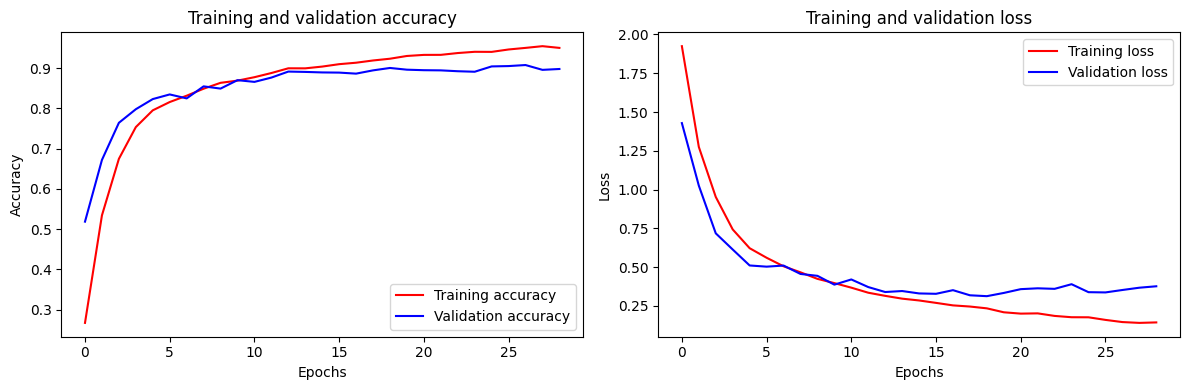

In [48]:
plot_training_history(history)

### Evaluate the model performance

Run the model on the test set and check the model's performance:

In [49]:
from modules.model import evaluate_model

In [50]:
evaluate_model(model, test_mfcc_ds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━

2024-04-15 09:53:56.693343: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8541 - loss: 0.4954
Test accuracy:      85%
Test loss:          0.44621187448501587
Precision:,         0.8647835602945313
Recall:   ,         0.8560267857142857
F1-score:,          0.8556094603493585


## Confusion matrix

In [51]:
from modules.model import plot_confusion_matrix

In [52]:
y_pred = model.predict(test_mfcc_ds)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.concat(list(test_mfcc_ds.map(lambda s,lab: lab)), axis=0)
label_names_slice = ['ddyo', 'emabega', 'gaali', 'kkono', 'mumaaso', 'unknown', 'yimirira']

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


2024-04-15 09:53:57.821137: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


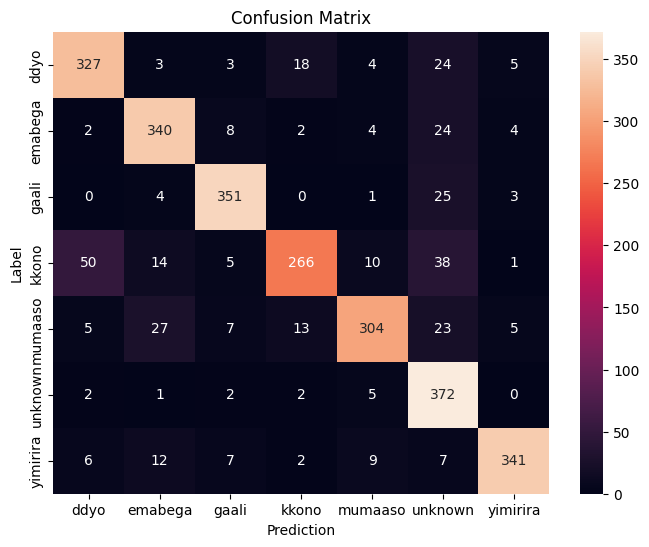

In [53]:
plot_confusion_matrix(y_true, y_pred, label_names_slice)

## save the Keras model

In [54]:
from modules.model import get_and_convert_file_size

In [55]:
KERAS_MODEL_PATH = "model/model_1.keras"

In [61]:
model.save(KERAS_MODEL_PATH)
keras_model_size = get_and_convert_file_size(KERAS_MODEL_PATH, 'KB')

File size: 419.314 Kilobytes


In [57]:
# Assuming you have a Keras model named 'model'
# import tensorflow as tf

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()
# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)

# Run an inference

In [58]:
from tensorflow.keras.models import load_model

KERAS_MODEL_PATH = "model/model_1.keras"
model = load_model(KERAS_MODEL_PATH)

In [59]:
from modules.inference import predict_audio

In [60]:
# file_path_inference = kkono_file_path
file_path_inference = 'ras1.wav'
predicted_label, probability = predict_audio(file_path_inference, model, SAMPLE_RATE)
print(f"Predicted label: {predicted_label}, Probability: {probability}")

ValueError: Exception encountered when calling MaxPooling2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node sequential_1/max_pooling2d_1/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential_1/conv2d_1/Relu)' with input shapes: [13,124,1,16].[0m

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(13, 124, 1, 16), dtype=float32)

In [ ]:
file_path_inference = ddyo_file_path
predicted_label, probability = predict_audio(file_path_inference, model, SAMPLE_RATE)
print(f"Predicted label: {predicted_label}, Probability: {probability}")

In [ ]:
file_path_inference = gaali_file_path
predicted_label, probability = predict_audio(file_path_inference, model, SAMPLE_RATE)
print(f"Predicted label: {predicted_label}, Probability: {probability}")

In [ ]:
file_path_inference = yimirira_file_path
predicted_label, probability = predict_audio(file_path_inference, model, SAMPLE_RATE)
print(f"Predicted label: {predicted_label}, Probability: {probability}")


In [ ]:
file_path_inference = emabega_file_path
predicted_label, probability = predict_audio(file_path_inference, model, SAMPLE_RATE)
print(f"Predicted label: {predicted_label}, Probability: {probability}")

In [ ]:
file_path_inference = mumasso_file_path
predicted_label, probability = predict_audio(file_path_inference, model, SAMPLE_RATE)
print(f"Predicted label: {predicted_label}, Probability: {probability}")
